In [2]:
#Proyecto Machine Learning

## Predicción de sismos

#Integrantes:


#*   Diego Acevedo
#*   Sebastián Jana
#*   Renzo Zanca

# Análisis de datos

In [3]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
ruta = "sismos2.csv"
df = pd.read_csv(ruta)
df.head()

,Unnamed: 0,Fecha local,Fecha UTC,Latitud,Longitud,Profundidad,Magnitud,Referencia
0,0,2010-01-01 14:52:41,2010-01-01 17:52:41,-33.509,-70.096,110.1,4.1 Ml,27 km al SE de Farellones\n
1,1,2010-01-01 13:59:23,2010-01-01 16:59:23,-32.667,-71.548,36.0,3.0 Ml,37 km al NO de Quillota \n
2,2,2010-01-01 12:51:46,2010-01-01 15:51:46,-34.662,-70.852,97.8,3.8 Ml,15 km al SE de San Fernando\n
3,3,2010-01-01 12:39:13,2010-01-01 15:39:13,-32.504,-71.517,36.1,3.1 Ml,27 km al O de La Ligua\n
4,4,2010-01-01 12:11:28,2010-01-01 15:11:28,-21.223,-68.923,120.4,3.9 Ml,52 km al SO de Mina Collahuasi\n


Limpieza de columnas

In [4]:
del df['Unnamed: 0']
del df['Fecha UTC']
del df['Referencia']

In [5]:
df['Magnitud'] = df['Magnitud'].str.replace(' Ml', '')
df['Magnitud'] = df['Magnitud'].str.replace(' Mb', '')
df['Magnitud'] = df['Magnitud'].str.replace(' Mw', '')
df['Magnitud'] = df['Magnitud'].str.replace(' Ms', '')
df['Magnitud'] = df['Magnitud'].str.replace('w', '')
df['Magnitud'] = df['Magnitud'].str.replace(' M', '')
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9


In [6]:
df.dtypes

Fecha local     object
Latitud        float64
Longitud       float64
Profundidad    float64
Magnitud        object
dtype: object

In [7]:
df['Magnitud'] = pd.to_numeric(df['Magnitud'])
df.dtypes

Fecha local     object
Latitud        float64
Longitud       float64
Profundidad    float64
Magnitud       float64
dtype: object

In [8]:
df.describe(include='all')

,Fecha local,Latitud,Longitud,Profundidad,Magnitud
count,81509,81509.000000,81509.000000,81509.000000,81509.000000
unique,81411,NaN,NaN,NaN,NaN
top,2012-02-09 16:23:59,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,-27.428315,-70.365318,78.985913,3.260884
std,NaN,6.659089,2.035417,60.374846,0.646851
min,NaN,-63.206000,-125.400000,0.000000,1.000000
25%,NaN,-32.792000,-71.759000,32.100000,2.800000
50%,NaN,-26.799000,-70.509000,57.000000,3.100000
75%,NaN,-21.389000,-68.921000,112.500000,3.600000


In [9]:
df[df['Longitud']==-125.4]

,Fecha local,Latitud,Longitud,Profundidad,Magnitud
65378,2019-10-01 00:55:52,-55.89,-125.4,10.0,5.4


In [10]:
df[df['Magnitud']==8.8]

,Fecha local,Latitud,Longitud,Profundidad,Magnitud
385,2010-02-27 03:34:08,-36.29,-73.239,30.1,8.8


Se agregan las columnas Fecha, Region, Intensidades (Leve, Medio, Fuerte) y Profundidad (Superficial, Intermedio, Profundo)

In [11]:
df['Fecha'] = np.nan
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,NaN
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,NaN
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,NaN
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,NaN
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,NaN


In [12]:
for indice, fila in df.iterrows():
  x=fila['Fecha local']
  date_time=dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
  date=dt.date(date_time.year,date_time.month,date_time.day)
  df.loc[indice,['Fecha']] = date
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01


In [13]:
df['Leve'] = np.nan
df['Medio'] = np.nan
df['Fuerte'] = np.nan
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,NaN,NaN,NaN
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,NaN,NaN,NaN
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,NaN,NaN,NaN
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,NaN,NaN,NaN
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,NaN,NaN,NaN


In [14]:
for indice, fila in df.iterrows():
  if fila['Magnitud'] < 4:
    df.loc[indice,['Leve']] = 1
    df.loc[indice,['Medio']] = 0
    df.loc[indice,['Fuerte']] = 0
  elif fila['Magnitud'] < 6:
    df.loc[indice,['Leve']] = 0
    df.loc[indice,['Medio']] = 1
    df.loc[indice,['Fuerte']] = 0
  else:
    df.loc[indice,['Leve']] = 0
    df.loc[indice,['Medio']] = 0
    df.loc[indice,['Fuerte']] = 1
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,0.0,1.0,0.0
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,1.0,0.0,0.0
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,1.0,0.0,0.0
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,1.0,0.0,0.0
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,1.0,0.0,0.0


In [15]:
df['Superficial'] = np.nan
df['Intermedio'] = np.nan
df['Profundo'] = np.nan
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,0.0,1.0,0.0,NaN,NaN,NaN
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,1.0,0.0,0.0,NaN,NaN,NaN
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,1.0,0.0,0.0,NaN,NaN,NaN
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,1.0,0.0,0.0,NaN,NaN,NaN
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,1.0,0.0,0.0,NaN,NaN,NaN


In [16]:
for indice, fila in df.iterrows():
  if fila['Profundidad'] < 60:
    df.loc[indice,['Superficial']] = 1
    df.loc[indice,['Intermedio']] = 0
    df.loc[indice,['Profundo']] = 0
  elif fila['Profundidad'] < 250:
    df.loc[indice,['Superficial']] = 0
    df.loc[indice,['Intermedio']] = 1
    df.loc[indice,['Profundo']] = 0
  else:
    df.loc[indice,['Superficial']] = 0
    df.loc[indice,['Intermedio']] = 0
    df.loc[indice,['Profundo']] = 1
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,0.0,1.0,0.0,0.0,1.0,0.0
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df['Region'] = np.nan
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo,Region
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,0.0,1.0,0.0,0.0,1.0,0.0,NaN
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0,NaN
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0,NaN
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0,NaN
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0,NaN


In [18]:
ruta='regiones.csv'
regiones=pd.read_csv(ruta)

In [19]:
for indice, fila in df.iterrows():
  for indice2, fila2 in regiones.iterrows():
    if fila['Latitud'] <= fila2['Latitud inicial'] and fila['Latitud'] > fila2['Latitud final']:
      df.loc[indice,['Region']] = fila2['Region']

In [20]:
df.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo,Region
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,0.0,1.0,0.0,0.0,1.0,0.0,Santiago
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0,Valparaiso
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0,Ohiggins
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0,Valparaiso
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0,Tarapaca


Limpieza de datos que no pertenecen a Chile

In [21]:
df2 = df[df['Longitud']<-64]
df3 = df2[df2['Longitud']>-74]
df4 = df3[df3['Latitud']<=-17.5]
df5 = df4[df4['Latitud']>-55.8]
df5.head()

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo,Region
0,2010-01-01 14:52:41,-33.509,-70.096,110.1,4.1,2010-01-01,0.0,1.0,0.0,0.0,1.0,0.0,Santiago
1,2010-01-01 13:59:23,-32.667,-71.548,36.0,3.0,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0,Valparaiso
2,2010-01-01 12:51:46,-34.662,-70.852,97.8,3.8,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0,Ohiggins
3,2010-01-01 12:39:13,-32.504,-71.517,36.1,3.1,2010-01-01,1.0,0.0,0.0,1.0,0.0,0.0,Valparaiso
4,2010-01-01 12:11:28,-21.223,-68.923,120.4,3.9,2010-01-01,1.0,0.0,0.0,0.0,1.0,0.0,Tarapaca


In [22]:
df5.describe(include = "all")

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo,Region
count,79020,79020.000000,79020.000000,79020.000000,79020.000000,79020,79020.000000,79020.000000,79020.000000,79020.00000,79020.000000,79020.000000,79020
unique,78924,NaN,NaN,NaN,NaN,4321,NaN,NaN,NaN,NaN,NaN,NaN,16
top,2016-04-11 10:33:26,NaN,NaN,NaN,NaN,2017-04-25,NaN,NaN,NaN,NaN,NaN,NaN,Antofagasta
freq,2,NaN,NaN,NaN,NaN,196,NaN,NaN,NaN,NaN,NaN,NaN,20790
mean,NaN,-27.049005,-70.323314,80.246840,3.247718,NaN,0.861402,0.136965,0.001632,0.49814,0.491053,0.010807,NaN
std,NaN,5.947058,1.674844,59.944184,0.635407,NaN,0.345529,0.343813,0.040371,0.50000,0.499923,0.103396,NaN
min,NaN,-54.842000,-73.999000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,NaN,-32.529250,-71.719000,33.000000,2.800000,NaN,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
50%,NaN,-25.509500,-70.457000,60.250000,3.100000,NaN,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
75%,NaN,-21.374000,-68.913000,113.000000,3.600000,NaN,1.000000,0.000000,0.000000,1.00000,1.000000,0.000000,NaN


Gráficos

array([[<AxesSubplot:title={'center':'Magnitud'}>]], dtype=object)

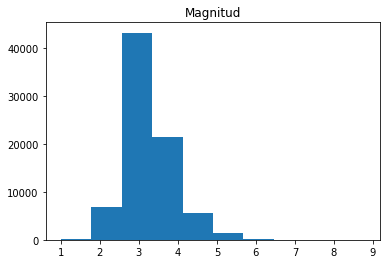

In [23]:
df5.hist(column="Magnitud", grid=False)

array([[<AxesSubplot:title={'center':'Latitud'}>]], dtype=object)

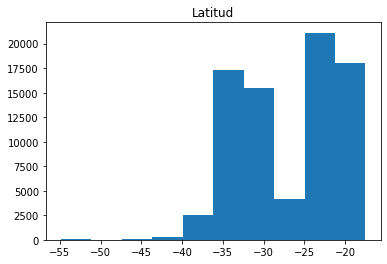

In [24]:
df5.hist(column="Latitud", grid=False)

array([[<AxesSubplot:title={'center':'Longitud'}>]], dtype=object)

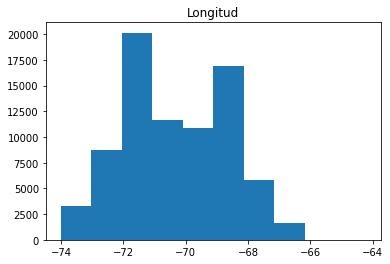

In [25]:
df5.hist(column="Longitud", grid=False)

array([[<AxesSubplot:title={'center':'Profundidad'}>]], dtype=object)

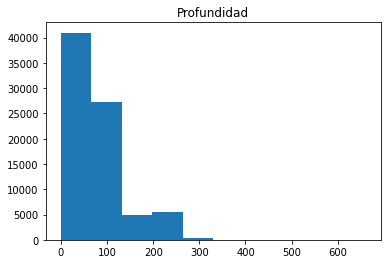

In [26]:
df5.hist(column=['Profundidad'],grid=False)

<AxesSubplot:>

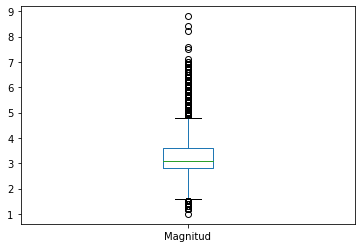

In [27]:
df5.boxplot(column='Magnitud',grid=False)

<AxesSubplot:>

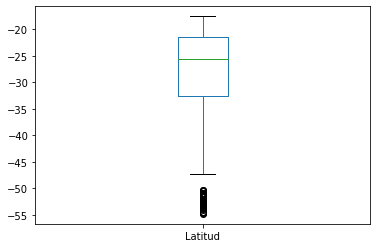

In [28]:
df5.boxplot(column='Latitud',grid=False)

<AxesSubplot:>

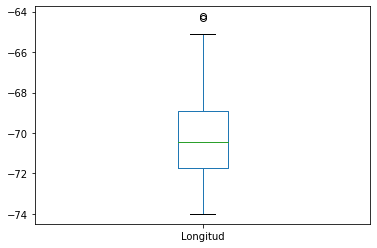

In [29]:
df5.boxplot(column='Longitud',grid=False)

<AxesSubplot:>

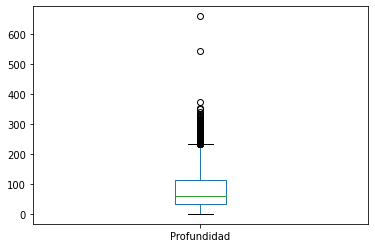

In [30]:
df5.boxplot(column='Profundidad',grid=False)

Información de los datos

In [31]:
min_date=dt.date(2021,11,3)
max_date=dt.date(2010,1,1)
for indice, fila in df5.iterrows():
  if fila['Fecha'] < min_date:
    min_date= fila['Fecha']
  if fila['Fecha'] > max_date:
    max_date= fila['Fecha']
print('Primera fecha registrada:',min_date)
print('Última fecha registrada:',max_date)

Primera fecha registrada: 2010-01-01
Última fecha registrada: 2021-11-01


In [32]:
diferencia = max_date - min_date
semanas = diferencia.days//7 +1
print('Semanas registradas:',semanas)

Semanas registradas: 618


In [33]:
df5['Region'].describe()

count           79020
unique             16
top       Antofagasta
freq            20790
Name: Region, dtype: object

In [34]:
df5['Region'].value_counts()

Antofagasta           20790
Tarapaca              16679
Coquimbo              12180
Santiago               6520
Valparaiso             4608
Atacama                4518
Ohiggins               4408
Maule                  4190
Arica y Parinacota     2273
Ñuble                  1332
Biobio                  497
Araucania               486
Los Rios                213
Los Lagos               182
Aysen                    84
Magallanes               60
Name: Region, dtype: int64

<AxesSubplot:>

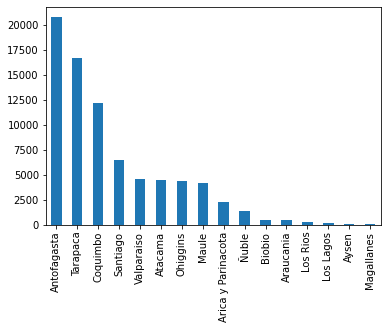

In [35]:
fig, ax = plt.subplots()
df5['Region'].value_counts().plot(ax=ax,kind='bar')

In [36]:
print('Sismos leves:',df5['Leve'].sum())
print('Sismos medios:',df5['Medio'].sum())
print('Sismos fuertes:',df5['Fuerte'].sum())

Sismos leves: 68068.0
Sismos medios: 10823.0
Sismos fuertes: 129.0


In [37]:
aux_terremotos = df5[df5['Fuerte']==1]
aux_terremotos['Region'].value_counts()

Coquimbo              35
Antofagasta           24
Tarapaca              18
Ñuble                  9
Arica y Parinacota     9
Maule                  8
Santiago               6
Ohiggins               5
Valparaiso             5
Atacama                5
Araucania              3
Biobio                 1
Los Lagos              1
Name: Region, dtype: int64

<AxesSubplot:>

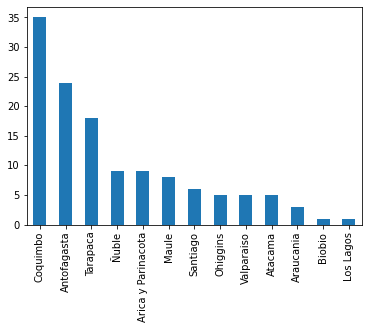

In [38]:
fig, ax = plt.subplots()
aux_terremotos['Region'].value_counts().plot(ax=ax,kind='bar')

In [39]:
print('Sismos superficiales:',df5['Superficial'].sum())
print('Sismos intermedios:',df5['Intermedio'].sum())
print('Sismos profundos:',df5['Profundo'].sum())

Sismos superficiales: 39363.0
Sismos intermedios: 38803.0
Sismos profundos: 854.0


In [40]:
leves_super = 0
leves_inter = 0
leves_prof = 0
for indice, fila in df5.iterrows():
  if fila['Leve'] == 1 and fila['Superficial'] == 1:
    leves_super += 1
  if fila['Leve'] == 1 and fila['Intermedio'] == 1:
    leves_inter += 1
  if fila['Leve'] == 1 and fila['Profundo'] == 1:
    leves_prof += 1
print('Sismos leves:')
print('')
print('Superficiales:',leves_super)
print('Intermedios:',leves_inter)
print('Profundos:',leves_prof)

Sismos leves:

Superficiales: 33652
Intermedios: 33914
Profundos: 502


In [41]:
medio_super = 0
medio_inter = 0
medio_prof = 0
for indice, fila in df5.iterrows():
  if fila['Medio'] == 1 and fila['Superficial'] == 1:
    medio_super += 1
  if fila['Medio'] == 1 and fila['Intermedio'] == 1:
    medio_inter += 1
  if fila['Medio'] == 1 and fila['Profundo'] == 1:
    medio_prof += 1
print('Sismos medios:')
print('')
print('Superficiales:',medio_super)
print('Intermedios:',medio_inter)
print('Profundos:',medio_prof)

Sismos medios:

Superficiales: 5622
Intermedios: 4856
Profundos: 345


In [42]:
fuertes_super = 0
fuertes_inter = 0
fuertes_prof = 0
for indice, fila in df5.iterrows():
  if fila['Fuerte'] == 1 and fila['Superficial'] == 1:
    fuertes_super += 1
  if fila['Fuerte'] == 1 and fila['Intermedio'] == 1:
    fuertes_inter += 1
  if fila['Fuerte'] == 1 and fila['Profundo'] == 1:
    fuertes_prof += 1
print('Sismos fuertes:')
print('')
print('Superficiales:',fuertes_super)
print('Intermedios:',fuertes_inter)
print('Profundos:',fuertes_prof)

Sismos fuertes:

Superficiales: 89
Intermedios: 33
Profundos: 7


In [43]:
df5[df5['Magnitud']>=7]

,Fecha local,Latitud,Longitud,Profundidad,Magnitud,Fecha,Leve,Medio,Fuerte,Superficial,Intermedio,Profundo,Region
385,2010-02-27 03:34:08,-36.290,-73.239,30.1,8.8,2010-02-27,0.0,0.0,1.0,1.0,0.0,0.0,Ñuble
25567,2014-04-01 20:57:59,-19.916,-71.110,29.7,7.0,2014-04-01,0.0,0.0,1.0,1.0,0.0,0.0,Tarapaca
25570,2014-04-01 20:49:25,-20.087,-70.395,25.0,7.5,2014-04-01,0.0,0.0,1.0,1.0,0.0,0.0,Tarapaca
25571,2014-04-01 20:46:45,-19.572,-70.908,38.9,8.2,2014-04-01,0.0,0.0,1.0,1.0,0.0,0.0,Tarapaca
25901,2014-04-02 23:43:16,-20.545,-70.418,26.1,7.6,2014-04-02,0.0,0.0,1.0,1.0,0.0,0.0,Tarapaca
33820,2015-09-16 20:18:38,-31.602,-71.646,35.0,7.1,2015-09-16,0.0,0.0,1.0,1.0,0.0,0.0,Coquimbo
33824,2015-09-16 19:54:31,-31.637,-71.741,23.3,8.4,2015-09-16,0.0,0.0,1.0,1.0,0.0,0.0,Coquimbo
72297,2020-09-01 00:09:27,-27.969,-71.241,31.3,7.0,2020-09-01,0.0,0.0,1.0,1.0,0.0,0.0,Atacama


# Matriz de características

Definición de las llaves de la matriz

In [44]:
lista_fechas = []
lista_regiones = []
fecha_inicial = dt.date(2010,3,1)
while fecha_inicial < dt.date(2021,11,1):
  for indice, fila in regiones.iterrows():
    lista_fechas.append(fecha_inicial)
    lista_regiones.append(fila['Region'])
  fecha_inicial = fecha_inicial + relativedelta(months=1)
matriz = pd.DataFrame({'Fecha':lista_fechas,'Region':lista_regiones})
matriz.head()

,Fecha,Region
0,2010-03-01,Arica y Parinacota
1,2010-03-01,Tarapaca
2,2010-03-01,Antofagasta
3,2010-03-01,Atacama
4,2010-03-01,Coquimbo


In [45]:
matriz.tail()

,Fecha,Region
2235,2021-10-01,Araucania
2236,2021-10-01,Los Rios
2237,2021-10-01,Los Lagos
2238,2021-10-01,Aysen
2239,2021-10-01,Magallanes


In [46]:
matriz['Dias_UltimoTerremoto'] = np.nan
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto
0,2010-03-01,Arica y Parinacota,NaN
1,2010-03-01,Tarapaca,NaN
2,2010-03-01,Antofagasta,NaN
3,2010-03-01,Atacama,NaN
4,2010-03-01,Coquimbo,NaN


In [47]:
fechas_terremotos = []
region_terremotos = []
for indice, fila in df5.iterrows():
  if fila['Fuerte']==1:
    fechas_terremotos.append(fila['Fecha'])
    region_terremotos.append(fila['Region'])
terremotos = pd.DataFrame({'Fechas': fechas_terremotos,'Regiones': region_terremotos})
terremotos.head()

,Fechas,Regiones
0,2010-01-28,Antofagasta
1,2010-02-07,Antofagasta
2,2010-02-12,Santiago
3,2010-02-27,Santiago
4,2010-02-27,Ohiggins


In [48]:
for indice, fila in matriz.iterrows():
  filtro1 = terremotos[terremotos['Fechas']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Regiones']==fila['Region']]
  if len(filtro2['Fechas']) == 0:
    ultimo = dt.date(2010,1,1)
  else:
    ultimo = max(filtro2['Fechas'])
  dif = fila['Fecha'] - ultimo
  matriz.loc[indice,['Dias_UltimoTerremoto']] = dif.days
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto
0,2010-03-01,Arica y Parinacota,59.0
1,2010-03-01,Tarapaca,59.0
2,2010-03-01,Antofagasta,22.0
3,2010-03-01,Atacama,59.0
4,2010-03-01,Coquimbo,59.0


In [49]:
matriz['CantLeves'] = np.nan
matriz['CantMedios'] = np.nan
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios
0,2010-03-01,Arica y Parinacota,59.0,NaN,NaN
1,2010-03-01,Tarapaca,59.0,NaN,NaN
2,2010-03-01,Antofagasta,22.0,NaN,NaN
3,2010-03-01,Atacama,59.0,NaN,NaN
4,2010-03-01,Coquimbo,59.0,NaN,NaN


In [50]:
df_leve = df5[df5['Leve']==1]
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] - relativedelta(months=1)
  filtro1 = df_leve[df_leve['Fecha']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']>rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  matriz.loc[indice,['CantLeves']] = len(filtro3['Leve'])
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios
0,2010-03-01,Arica y Parinacota,59.0,2.0,NaN
1,2010-03-01,Tarapaca,59.0,26.0,NaN
2,2010-03-01,Antofagasta,22.0,17.0,NaN
3,2010-03-01,Atacama,59.0,0.0,NaN
4,2010-03-01,Coquimbo,59.0,15.0,NaN


In [51]:
df_medio = df5[df5['Medio']==1]
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] - relativedelta(months=1)
  filtro1 = df_medio[df_medio['Fecha']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']>rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  matriz.loc[indice,['CantMedios']] = len(filtro3['Medio'])
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0
1,2010-03-01,Tarapaca,59.0,26.0,7.0
2,2010-03-01,Antofagasta,22.0,17.0,25.0
3,2010-03-01,Atacama,59.0,0.0,2.0
4,2010-03-01,Coquimbo,59.0,15.0,6.0


In [52]:
matriz['CantSuper'] = np.nan
matriz['CantInter'] = np.nan
matriz['CantProf'] = np.nan
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,NaN,NaN,NaN
1,2010-03-01,Tarapaca,59.0,26.0,7.0,NaN,NaN,NaN
2,2010-03-01,Antofagasta,22.0,17.0,25.0,NaN,NaN,NaN
3,2010-03-01,Atacama,59.0,0.0,2.0,NaN,NaN,NaN
4,2010-03-01,Coquimbo,59.0,15.0,6.0,NaN,NaN,NaN


In [53]:
df_super = df5[df5['Superficial']==1]
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] - relativedelta(months=1)
  filtro1 = df_super[df_super['Fecha']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']>rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  matriz.loc[indice,['CantSuper']] = len(filtro3['Superficial'])
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,NaN,NaN
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,NaN,NaN
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,NaN,NaN
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,NaN,NaN
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,NaN,NaN


In [54]:
df_inter = df5[df5['Intermedio']==1]
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] - relativedelta(months=1)
  filtro1 = df_inter[df_inter['Fecha']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']>rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  matriz.loc[indice,['CantInter']] = len(filtro3['Intermedio'])
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,NaN
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,NaN
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,NaN
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,NaN
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,NaN


In [55]:
df_prof = df5[df5['Profundo']==1]
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] - relativedelta(months=1)
  filtro1 = df_prof[df_prof['Fecha']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']>rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  matriz.loc[indice,['CantProf']] = len(filtro3['Profundo'])
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0


In [56]:
matriz['Max_UltimoMes'] = np.nan
matriz['Min_UltimoMes'] = np.nan
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,NaN,NaN
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,NaN,NaN
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,NaN,NaN
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,NaN,NaN
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,NaN,NaN


In [57]:
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] - relativedelta(months=1)
  filtro1 = df5[df5['Fecha']<fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']>rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  if len(filtro3['Magnitud']) != 0:
    maximo = max(filtro3['Magnitud'])
    minimo = min(filtro3['Magnitud'])
  else:
    maximo = 0
    minimo = 0
  matriz.loc[indice,['Max_UltimoMes']] = maximo
  matriz.loc[indice,['Min_UltimoMes']] = minimo
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6


In [58]:
matriz['Var_SismosLeves'] = np.nan
matriz['Var_SismosMedios'] = np.nan
matriz.head()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,Var_SismosLeves,Var_SismosMedios
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2,NaN,NaN
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5,NaN,NaN
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1,NaN,NaN
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1,NaN,NaN
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6,NaN,NaN


In [59]:
for indice, fila in matriz.iterrows():
  rango1 = fila['Fecha'] - relativedelta(months=1)
  rango2 = fila['Fecha'] - relativedelta(months=2)
  aux_UM = df_leve[df_leve['Fecha']<fila['Fecha']]
  aux_MA = df_leve[df_leve['Fecha']<rango1]
  aux2_UM = aux_UM[aux_UM['Fecha']>rango1]
  aux2_MA = aux_MA[aux_MA['Fecha']>rango2]
  ultimoMes = aux2_UM[aux_UM['Region']==fila['Region']]
  mesAnterior = aux2_MA[aux_MA['Region']==fila['Region']]
  sismos_UM = len(ultimoMes['Magnitud'])
  sismos_MA = len(mesAnterior['Magnitud'])
  if sismos_UM + sismos_MA == 0:
    matriz.loc[indice,['Var_SismosLeves']] = 0
  else:
    matriz.loc[indice,['Var_SismosLeves']] = (sismos_UM - sismos_MA)/(sismos_UM + sismos_MA)
matriz.head()

<ipython-input-59-0c68d88e857e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ultimoMes = aux2_UM[aux_UM['Region']==fila['Region']]
<ipython-input-59-0c68d88e857e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mesAnterior = aux2_MA[aux_MA['Region']==fila['Region']]


,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,Var_SismosLeves,Var_SismosMedios
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2,0.333333,NaN
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5,0.106383,NaN
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1,0.062500,NaN
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1,-1.000000,NaN
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6,-0.090909,NaN


In [60]:
for indice, fila in matriz.iterrows():
  rango1 = fila['Fecha'] - relativedelta(months=1)
  rango2 = fila['Fecha'] - relativedelta(months=2)
  aux_UM = df_medio[df_medio['Fecha']<fila['Fecha']]
  aux_MA = df_medio[df_medio['Fecha']<rango1]
  aux2_UM = aux_UM[aux_UM['Fecha']>rango1]
  aux2_MA = aux_MA[aux_MA['Fecha']>rango2]
  ultimoMes = aux2_UM[aux_UM['Region']==fila['Region']]
  mesAnterior = aux2_MA[aux_MA['Region']==fila['Region']]
  sismos_UM = len(ultimoMes['Magnitud'])
  sismos_MA = len(mesAnterior['Magnitud'])
  if sismos_UM + sismos_MA == 0:
    matriz.loc[indice,['Var_SismosMedios']] = 0
  else:
    matriz.loc[indice,['Var_SismosMedios']] = (sismos_UM - sismos_MA)/(sismos_UM + sismos_MA)
matriz.head()

<ipython-input-60-2e9606884825>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ultimoMes = aux2_UM[aux_UM['Region']==fila['Region']]
<ipython-input-60-2e9606884825>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mesAnterior = aux2_MA[aux_MA['Region']==fila['Region']]


,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,Var_SismosLeves,Var_SismosMedios
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2,0.333333,-1.000000
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5,0.106383,0.076923
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1,0.062500,0.190476
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1,-1.000000,-0.200000
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6,-0.090909,-0.076923


In [61]:
matriz['Var_max'] = np.nan
matriz['Var_min'] = np.nan

In [62]:
for indice, fila in matriz.iterrows():
  rango1 = fila['Fecha'] - relativedelta(months=1)
  rango2 = fila['Fecha'] - relativedelta(months=2)
  aux_UM = df5[df5['Fecha']<fila['Fecha']]
  aux_MA = df5[df5['Fecha']<rango1]
  aux2_UM = aux_UM[aux_UM['Fecha']>rango1]
  aux2_MA = aux_MA[aux_MA['Fecha']>rango2]
  ultimoMes = aux2_UM[aux_UM['Region']==fila['Region']]
  mesAnterior = aux2_MA[aux_MA['Region']==fila['Region']]
  if len(ultimoMes['Magnitud']) == 0:
    max_UM = 0
    min_UM = 0
  else:
    max_UM = max(ultimoMes['Magnitud'])
    min_UM = min(ultimoMes['Magnitud'])

  if len(mesAnterior['Magnitud']) == 0:
    max_MA = 0
    min_MA = 0

  else:
    max_MA = max(mesAnterior['Magnitud'])
    min_MA = min(mesAnterior['Magnitud'])

  if max_UM + max_MA == 0:
    matriz.loc[indice,['Var_max']] = 0
  else:
    matriz.loc[indice,['Var_max']] = (max_UM - max_MA)/(max_UM + max_MA)

  if min_UM + min_MA == 0:
    matriz.loc[indice,['Var_min']] = 0
  else:
    matriz.loc[indice,['Var_min']] = (min_UM - min_MA)/(min_UM + min_MA)

matriz.head()

<ipython-input-62-b074925f1be2>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ultimoMes = aux2_UM[aux_UM['Region']==fila['Region']]
<ipython-input-62-b074925f1be2>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mesAnterior = aux2_MA[aux_MA['Region']==fila['Region']]


,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,Var_SismosLeves,Var_SismosMedios,Var_max,Var_min
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2,0.333333,-1.000000,-0.126437,-0.085714
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5,0.106383,0.076923,-0.019231,-0.038462
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1,0.062500,0.190476,-0.032258,-0.045455
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1,-1.000000,-0.200000,-0.066667,0.138889
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6,-0.090909,-0.076923,-0.055556,0.000000


In [63]:
matriz['Es_Arica'] = np.zeros(len(matriz))
matriz['Es_Tarapaca'] = np.zeros(len(matriz))
matriz['Es_Antofagasta'] = np.zeros(len(matriz))
matriz['Es_Atacama'] = np.zeros(len(matriz))
matriz['Es_Coquimbo'] = np.zeros(len(matriz))
matriz['Es_Valparaiso'] = np.zeros(len(matriz))
matriz['Es_Santiago'] = np.zeros(len(matriz))
matriz['Es_Ohiggins'] = np.zeros(len(matriz))
matriz['Es_Maule'] = np.zeros(len(matriz))
matriz['Es_Ñuble'] = np.zeros(len(matriz))
matriz['Es_BioBio'] = np.zeros(len(matriz))
matriz['Es_Araucania'] = np.zeros(len(matriz))
matriz['Es_LosRios'] = np.zeros(len(matriz))
matriz['Es_LosLagos'] = np.zeros(len(matriz))
matriz['Es_Aysen'] = np.zeros(len(matriz))
matriz['Es_Magallanes'] = np.zeros(len(matriz))

In [64]:
for indice,fila in matriz.iterrows():
  if fila['Region'] == 'Arica y Parinacota':
    matriz.loc[indice,['Es_Arica']] = 1
  if fila['Region'] == 'Tarapaca':
    matriz.loc[indice,['Es_Tarapaca']] = 1
  if fila['Region'] == 'Antofagasta':
    matriz.loc[indice,['Es_Antofagasta']] = 1
  if fila['Region'] == 'Atacama':
    matriz.loc[indice,['Es_Atacama']] = 1
  if fila['Region'] == 'Coquimbo':
    matriz.loc[indice,['Es_Coquimbo']] = 1
  if fila['Region'] == 'Valparaiso':
    matriz.loc[indice,['Es_Valparaiso']] = 1
  if fila['Region'] == 'Santiago':
    matriz.loc[indice,['Es_Santiago']] = 1
  if fila['Region'] == 'Ohiggins':
    matriz.loc[indice,['Es_Ohiggins']] = 1
  if fila['Region'] == 'Maule':
    matriz.loc[indice,['Es_Maule']] = 1
  if fila['Region'] == 'Ñuble':
    matriz.loc[indice,['Es_Ñuble']] = 1
  if fila['Region'] == 'Biobio':
    matriz.loc[indice,['Es_BioBio']] = 1
  if fila['Region'] == 'Araucania':
    matriz.loc[indice,['Es_Araucania']] = 1
  if fila['Region'] == 'Los Rios':
    matriz.loc[indice,['Es_LosRios']] = 1
  if fila['Region'] == 'Los Lagos':
    matriz.loc[indice,['Es_LosLagos']] = 1
  if fila['Region'] == 'Aysen':
    matriz.loc[indice,['Es_Aysen']] = 1
  if fila['Region'] == 'Magallanes':
    matriz.loc[indice,['Es_Magallanes']] = 1

matriz.head()


,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,...,Es_Santiago,Es_Ohiggins,Es_Maule,Es_Ñuble,Es_BioBio,Es_Araucania,Es_LosRios,Es_LosLagos,Es_Aysen,Es_Magallanes
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
matriz['Max_mes_siguiente']=np.nan

In [66]:
for indice, fila in matriz.iterrows():
  rango = fila['Fecha'] + relativedelta(months=1)
  filtro1 = df5[df5['Fecha']>fila['Fecha']]
  filtro2 = filtro1[filtro1['Fecha']<rango]
  filtro3 = filtro2[filtro2['Region']==fila['Region']]
  if len(filtro3['Magnitud']) != 0:
    maximo = max(filtro3['Magnitud'])
  else:
    maximo = 0
  matriz.loc[indice,['Max_mes_siguiente']] = maximo
matriz.head()


,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,...,Es_Ohiggins,Es_Maule,Es_Ñuble,Es_BioBio,Es_Araucania,Es_LosRios,Es_LosLagos,Es_Aysen,Es_Magallanes,Max_mes_siguiente
0,2010-03-01,Arica y Parinacota,59.0,2.0,0.0,1.0,1.0,0.0,3.8,3.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7
1,2010-03-01,Tarapaca,59.0,26.0,7.0,3.0,30.0,0.0,5.1,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3
2,2010-03-01,Antofagasta,22.0,17.0,25.0,11.0,26.0,6.0,6.0,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9
3,2010-03-01,Atacama,59.0,0.0,2.0,1.0,1.0,0.0,4.2,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9
4,2010-03-01,Coquimbo,59.0,15.0,6.0,10.0,11.0,0.0,5.1,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1


In [67]:
matriz.tail()

,Fecha,Region,Dias_UltimoTerremoto,CantLeves,CantMedios,CantSuper,CantInter,CantProf,Max_UltimoMes,Min_UltimoMes,...,Es_Ohiggins,Es_Maule,Es_Ñuble,Es_BioBio,Es_Araucania,Es_LosRios,Es_LosLagos,Es_Aysen,Es_Magallanes,Max_mes_siguiente
2235,2021-10-01,Araucania,3925.0,8.0,1.0,9.0,0.0,0.0,4.5,2.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.6
2236,2021-10-01,Los Rios,4291.0,2.0,0.0,1.0,1.0,0.0,3.3,3.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2237,2021-10-01,Los Lagos,736.0,1.0,0.0,0.0,1.0,0.0,2.8,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.3
2238,2021-10-01,Aysen,4291.0,1.0,0.0,1.0,0.0,0.0,2.8,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.8
2239,2021-10-01,Magallanes,4291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.4


# Modelo:



In [68]:
caracteristicas = ['Dias_UltimoTerremoto','CantLeves','CantMedios','CantSuper','CantInter','CantProf','Max_UltimoMes', 'Min_UltimoMes','Var_SismosLeves',  'Var_SismosMedios', 'Var_max','Var_min','Es_Arica','Es_Tarapaca','Es_Antofagasta','Es_Atacama','Es_Coquimbo','Es_Valparaiso','Es_Santiago','Es_Ohiggins','Es_Maule','Es_Ñuble','Es_BioBio','Es_Araucania','Es_LosRios','Es_LosLagos','Es_Aysen','Es_Magallanes']

In [69]:
x = matriz.loc[:,caracteristicas].to_numpy()

In [70]:
etiqueta = ['Max_mes_siguiente']

In [71]:
y = matriz.loc[:,etiqueta].to_numpy()

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

Arbol de decisión

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
ad = DecisionTreeRegressor()

In [76]:
ad.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
y_pred = ad.predict(x_test)

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:
MSE = mean_squared_error(y_test, y_pred)
print('MSE: '+str(MSE))
RMSE = MSE**0.5
print('RMSE: '+str(RMSE))
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: '+str(MAE))

MSE: 2.575767857142857
RMSE: 1.6049198911917246
MAE: 1.0505357142857141


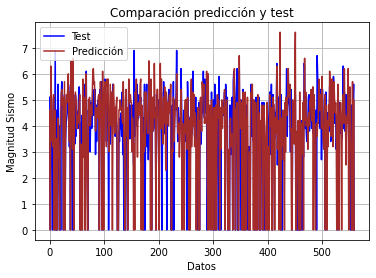

In [81]:
plt.plot(y_test, 'blue', label = 'Test')
plt.plot(y_pred, 'brown', label = 'Predicción')
plt.title('Comparación predicción y test')
plt.xlabel('Datos')
plt.ylabel('Magnitud Sismo')
plt.grid()
plt.legend(loc='best')
plt.show()

Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf = RandomForestRegressor()

In [84]:
rf.fit(x_train, y_train)

<ipython-input-84-fc0aeedd5571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor()

In [85]:
y_pred2 = rf.predict(x_test)

In [86]:
MSE = mean_squared_error(y_test, y_pred2)
print('MSE: '+str(MSE))
RMSE = MSE**0.5
print('RMSE: '+str(RMSE))
MAE = mean_absolute_error(y_test, y_pred2)
print('MAE: '+str(MAE))

MSE: 1.5009034267857144
RMSE: 1.2251136383151215
MAE: 0.8258625


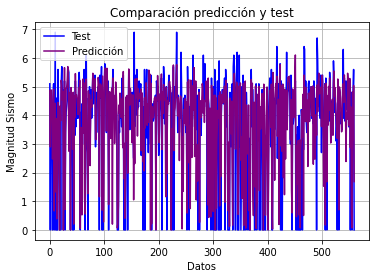

In [87]:
plt.plot(y_test, 'blue', label = 'Test')
plt.plot(y_pred2, 'purple', label = 'Predicción')
plt.title('Comparación predicción y test')
plt.xlabel('Datos')
plt.ylabel('Magnitud Sismo')
plt.grid()
plt.legend(loc='best')
plt.show()

Regresión lineal

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
reg = LinearRegression().fit(x_train,y_train)

In [90]:
y_pred3 = reg.predict(x_test)

In [91]:
MSE = mean_squared_error(y_test, y_pred3)
print('MSE: '+str(MSE))
RMSE = MSE**0.5
print('RMSE: '+str(RMSE))
MAE = mean_absolute_error(y_test, y_pred3)
print('MAE: '+str(MAE))


MSE: 1.338120548390844
RMSE: 1.1567716059753732
MAE: 0.8276637172684461


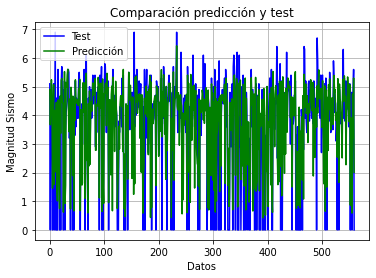

In [92]:
plt.plot(y_test, 'blue', label = 'Test')
plt.plot(y_pred3, 'green', label = 'Predicción')
plt.title('Comparación predicción y test')
plt.xlabel('Datos')
plt.ylabel('Magnitud Sismo')
plt.grid()
plt.legend(loc='best')
plt.show()

# Validación cruzada

In [93]:
from sklearn.model_selection import cross_val_score

Decision Tree

In [94]:
cv_ad = cross_val_score(DecisionTreeRegressor(),x,y,cv=10,scoring='neg_mean_absolute_error')
print(-1*np.mean(cv_ad))

1.0275446428571426


Random Forest

In [95]:
cv_rf = cross_val_score(RandomForestRegressor(),x,y,cv=10,scoring='neg_mean_absolute_error')
print(-1*np.mean(cv_rf))

C:\Users\renzo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\renzo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\renzo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\renzo\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector 

0.8526709821428572


Regresion Lineal

In [96]:
cv_rl = cross_val_score(LinearRegression(),x,y,cv=10,scoring='neg_mean_absolute_error')
print(-1*np.mean(cv_rl))

0.8178376479175208
